In [35]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')


Tensorflow version: 2.2.0


## Hyperparameters

In [36]:
# import tushare as ts
# pro = ts.pro_api('f198ddf6f6c8918413793b567bed6269e931f433abd746b26a3c2668')
# dd = pro.daily(ts_code='000001.SZ', start_data='20180701', end_data='20201119')
# dd.to_csv('pro001.csv')

In [37]:
batch_size = 128
seq_len = 128
d_k = 32
d_v = 32
n_heads = 32
ff_dim = 256

## Load Tesla data

In [38]:
# TSLA_path = '../dataset/TSLA.csv'

# df = pd.read_csv(TSLA_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close','Adj Close','Volume'])

# # Replace 0 to avoid dividing by 0 later on
# df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
# df.sort_values('Date', inplace=True)
# df.tail()

In [39]:
# df.drop(labels='Adj Close',axis=1,inplace=True)
# df.head()

## Plot daily Tesla closing prices and volume

In [40]:
# fig = plt.figure(figsize=(15,10))
# st = fig.suptitle("Tesla Close Price and Volume", fontsize=20)
# st.set_y(0.92)

# ax1 = fig.add_subplot(211)
# ax1.plot(df['Close'], label='Tesla Close Price')
# ax1.set_xticks(range(0, df.shape[0], 1464))
# ax1.set_xticklabels(df['Date'].loc[::1464])
# ax1.set_ylabel('Close Price', fontsize=18)
# ax1.legend(loc="upper left", fontsize=12)

# ax2 = fig.add_subplot(212)
# ax2.plot(df['Volume'], label='Tesla Volume')
# ax2.set_xticks(range(0, df.shape[0], 1464))
# ax2.set_xticklabels(df['Date'].loc[::1464])
# ax2.set_ylabel('Volume', fontsize=18)
# ax2.legend(loc="upper left", fontsize=12)

## Calculate normalized percentage change of all columns

In [41]:
# '''Calculate percentage change'''

# # df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
# # df['High'] = df['High'].pct_change() # Create arithmetic returns column
# # df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
# # df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
# # df['Volume'] = df['Volume'].pct_change()

# df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

# ###############################################################################
# '''Create indexes to split dataset'''

# # times = sorted(df.index.values)
# # last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
# # last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

# ###############################################################################
# '''Normalize price columns'''
# #
# # min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
# # max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

# # Min-max normalize price columns (0-1 range)
# # df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
# # df['High'] = (df['High'] - min_return) / (max_return - min_return)
# # df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
# # df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

# ###############################################################################
# '''Normalize volume column'''

# # min_volume = df[(df.index < last_20pct)]['Volume'].min(axis=0)
# # max_volume = df[(df.index < last_20pct)]['Volume'].max(axis=0)

# # Min-max normalize volume columns (0-1 range)
# # df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

# ###############################################################################
# '''Create training, validation and test split'''

# df_train = df[(df.index < 221)]  # Training data are 80% of total data
# # df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
# df_test = df

# # Remove date column
# df_train.drop(columns=['Date'], inplace=True)
# # df_val.drop(columns=['Date'], inplace=True)
# df_test.drop(columns=['Date'], inplace=True)

# # Convert pandas columns into arrays
# train_data = df_train.values
# # val_data = df_val.values
# test_data = df_test.values
# print('Training data shape: {}'.format(train_data.shape))
# # print('Validation data shape: {}'.format(val_data.shape))
# print('Test data shape: {}'.format(test_data.shape))

# df_train.head()

## Plot daily changes of close prices and volume

In [42]:
# fig = plt.figure(figsize=(15,12))
# st = fig.suptitle("Data Separation", fontsize=20)
# st.set_y(0.95)

# ###############################################################################

# ax1 = fig.add_subplot(211)
# ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

# # ax1.plot(np.arange(train_data.shape[0], 
# #                    train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

# ax1.plot(np.arange(train_data.shape[0], 
#                    train_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Closing Returns')
# ax1.set_title("Close Price", fontsize=18)
# ax1.legend(loc="best", fontsize=12)

# ###############################################################################

# ax2 = fig.add_subplot(212)
# ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

# # ax2.plot(np.arange(train_data.shape[0], 
# #                    train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

# ax2.plot(np.arange(train_data.shape[0], 
#                    train_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Normalized Volume Changes')
# ax2.set_title("Volume", fontsize=18)
# ax2.legend(loc="best", fontsize=12)

## Create chunks of training, validation and test data

In [43]:
# # Training data
# X_train, y_train = [], []
# for i in range(seq_len, len(train_data)):
#   X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
#   y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
# X_train, y_train = np.array(X_train), np.array(y_train)

# ###############################################################################

# # Validation data
# # X_val, y_val = [], []
# # for i in range(seq_len, len(val_data)):
# #     X_val.append(val_data[i-seq_len:i])
# #     y_val.append(val_data[:, 3][i])
# # X_val, y_val = np.array(X_val), np.array(y_val)

# ###############################################################################

# # Test data
# X_test, y_test = [], []
# for i in range(seq_len, len(test_data)):
#     X_test.append(test_data[i-seq_len:i])
#     y_test.append(test_data[:, 3][i])    
# X_test, y_test = np.array(X_test), np.array(y_test)

# print('Training set shape', X_train.shape, y_train.shape)
# # print('Validation set shape', X_val.shape, y_val.shape)
# print('Testing set shape' ,X_test.shape, y_test.shape)

In [44]:
# y_test,df.tail()

## TimeVector

In [45]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config
  

## Transformer

In [46]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_se1 = Conv1D(filters=self.ff_dim//2, kernel_size=1)
    self.ff_conv1D_se2 = Conv1D(filters=self.ff_dim, kernel_size=1,activation='sigmoid')
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    aa_layer = self.ff_conv1D_se1(ff_layer)
    aa_layer = self.ff_dropout(aa_layer)
    aa_layer = self.ff_conv1D_se2(aa_layer)
    aa_layer = self.ff_dropout(aa_layer)
    ff_layer = aa_layer+ff_layer
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config          

## Model

In [47]:
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   '''Construct model'''
#   in_seq = Input(shape=(seq_len, 5))
#   x = time_embedding(in_seq)
#   x = Concatenate(axis=-1)([in_seq, x])
#   x = attn_layer1((x, x, x))
#   x = attn_layer2((x, x, x))
#   x = attn_layer3((x, x, x))
#   x = GlobalAveragePooling1D(data_format='channels_first')(x)
#   x = Dropout(0.1)(x)
#   x = Dense(64, activation='relu')(x)
#   x = Dropout(0.1)(x)
#   out = Dense(1, activation='linear')(x)

#   model = Model(inputs=in_seq, outputs=out)
#   model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
#   return model


# model = create_model()
# model.summary()

# # callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
# #                                               monitor=None, 
# #                                               save_best_only=False, verbose=1)

# history = model.fit(X_train, y_train, 
#                     batch_size=batch_size, 
#                     epochs=500, )
#                     # validation_data=(X_val, y_val)) 
# model.save('./Transformer+TimeEmbedding.hdf5')
# model = tf.keras.models.load_model('./Transformer+TimeEmbedding.hdf5',
#                                    custom_objects={'Time2Vector': Time2Vector, 
#                                                    'SingleAttention': SingleAttention,
#                                                    'MultiAttention': MultiAttention,
#                                                    'TransformerEncoder': TransformerEncoder})


# ###############################################################################
# '''Calculate predictions and metrics'''

# #Calculate predication for training, validation and test data
# train_pred = model.predict(X_train)
# # val_pred = model.predict(X_val)
# test_pred = model.predict(X_test)

# #Print evaluation metrics for all datasets
# train_eval = model.evaluate(X_train, y_train, verbose=0)
# # val_eval = model.evaluate(X_val, y_val, verbose=0)
# test_eval = model.evaluate(X_test, y_test, verbose=0)
# print(' ')
# print('Evaluation metrics')
# print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
# # print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
# print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

# ###############################################################################
# '''Display results'''

# fig = plt.figure(figsize=(15,20))
# st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
# st.set_y(0.92)

# #Plot training data results
# ax11 = fig.add_subplot(311)
# ax11.plot(train_data[:, 3], label='Tesla Closing Returns')
# ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted Tesla Closing Returns')
# ax11.set_title("Training Data", fontsize=18)
# ax11.set_xlabel('Date')
# ax11.set_ylabel('Tesla Closing Returns')
# ax11.legend(loc="best", fontsize=12)

# # #Plot validation data results
# # ax21 = fig.add_subplot(312)
# # ax21.plot(val_data[:, 3], label='Tesla Closing Returns')
# # ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted Tesla Closing Returns')
# # ax21.set_title("Validation Data", fontsize=18)
# # ax21.set_xlabel('Date')
# # ax21.set_ylabel('Tesla Closing Returns')
# # ax21.legend(loc="best", fontsize=12)

# #Plot test data results
# ax31 = fig.add_subplot(313)
# ax31.plot(test_data[:, 3], label='Tesla Closing Returns')
# ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted Tesla Closing Returns')
# ax31.set_title("Test Data", fontsize=18)
# ax31.set_xlabel('Date')
# ax31.set_ylabel('Tesla Closing Returns')
# ax31.legend(loc="best", fontsize=12)

## Model metrics

In [48]:
# '''Display model metrics'''

# fig = plt.figure(figsize=(15,20))
# st = fig.suptitle("Transformer + TimeEmbedding Model Metrics", fontsize=22)
# st.set_y(0.92)

# #Plot model loss
# ax1 = fig.add_subplot(311)
# ax1.plot(history.history['loss'], label='Training loss (MSE)')
# # ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
# ax1.set_title("Model loss", fontsize=18)
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Loss (MSE)')
# ax1.legend(loc="best", fontsize=12)

# #Plot MAE
# ax2 = fig.add_subplot(312)
# ax2.plot(history.history['mae'], label='Training MAE')
# # ax2.plot(history.history['val_mae'], label='Validation MAE')
# ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Mean average error (MAE)')
# ax2.legend(loc="best", fontsize=12)

# #Plot MAPE
# ax3 = fig.add_subplot(313)
# ax3.plot(history.history['mape'], label='Training MAPE')
# # ax3.plot(history.history['val_mape'], label='Validation MAPE')
# ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
# ax3.set_xlabel('Epoch')
# ax3.set_ylabel('Mean average percentage error (MAPE)')
# ax3.legend(loc="best", fontsize=12)

## Model architecture overview

In [49]:
# tf.keras.utils.plot_model(
#     model,
#     to_file="Tesla_Transformer+TimeEmbedding.png",
#     show_shapes=True,
#     show_layer_names=True,
#     expand_nested=True,
#     dpi=96,)

# Moving Average

## Moving Average - Load Tesla data again, to apply rolling window

In [50]:
# test_size = 30

In [51]:
# from sklearn.preprocessing import MinMaxScaler
# Tesla_path = '../dataset/TSLA.csv'
# df = pd.read_csv(Tesla_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close','Adj Close','Volume'])
# df.head()




In [52]:
# minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
# df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
# df_log = pd.DataFrame(df_log)
# df_log.head()

In [53]:
# df_train = df_log.iloc[:-test_size]
# df_test = df_log.iloc[-test_size:]
# df.shape, df_train.shape, df_test.shape

In [54]:
Tesla_path = '/home/donglong_4/pro001.csv'
df = pd.read_csv(Tesla_path, delimiter=',', usecols=['ts_code','Date','Open','High','Low','Close','pre_close','change','pct_chg','Volume','amount'])
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)
df.drop(labels='ts_code',axis=1,inplace=True)
df.drop(labels='pre_close',axis=1,inplace=True)
df.drop(labels='pct_chg',axis=1,inplace=True)
df.drop(labels='change',axis=1,inplace=True)
df.drop(labels='amount',axis=1,inplace=True)
df[['Open', 'High', 'Low', 'Close','Volume']] = df[['Open', 'High', 'Low', 'Close','Volume']].rolling(10).mean()
# df.drop('index')
df.dropna(how='any', axis=0, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Volume
4990,20000907,17.745,17.848,17.545,17.629,39335.663
4989,20000908,17.630,17.737,17.435,17.514,38651.163
4988,20000911,17.513,17.637,17.318,17.400,37478.563
4987,20000912,17.399,17.551,17.212,17.314,36772.263
4986,20000913,17.311,17.521,17.144,17.265,38867.663


In [55]:
# Tesla_path = '../dataset/TSLA.csv'

# df = pd.read_csv(Tesla_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close','Adj Close','Volume'])
# df.drop(labels='Adj Close',axis=1,inplace=True)
# # Replace 0 to avoid dividing by 0 later on
# df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
# df.sort_values('Date', inplace=True)

# # Apply moving average with a window of 10 days to all columns
# df[['Open', 'High', 'Low', 'Close','Volume']] = df[['Open', 'High', 'Low', 'Close','Volume']].rolling(10).mean() 

# # Drop all rows with NaN values
# df.dropna(how='any', axis=0, inplace=True) 
# df.head()

## Moving Average - Plot daily Tesla closing prices and volume

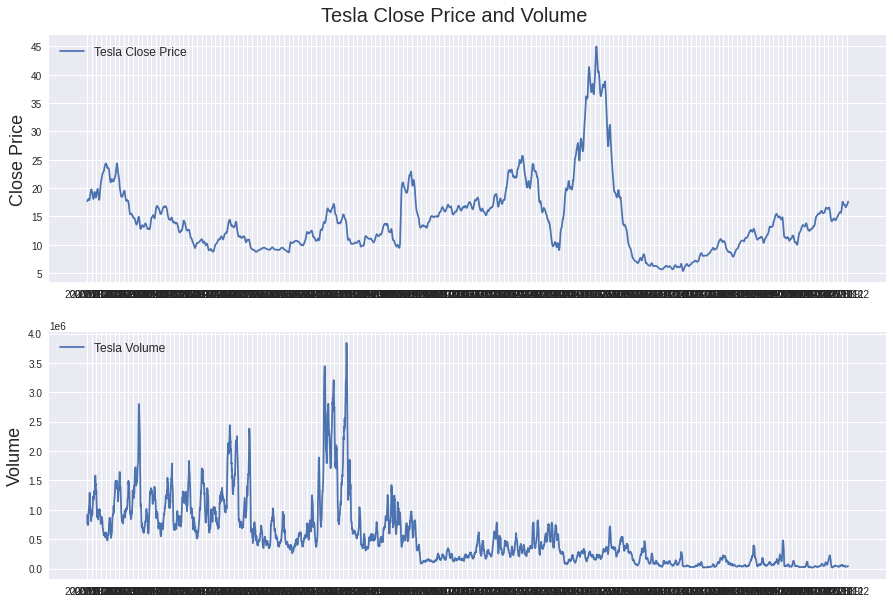

In [56]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Tesla Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label='Tesla Close Price')
ax1.set_xticks(range(0, df.shape[0], 30))
ax1.set_xticklabels(df['Date'].loc[::30])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label='Tesla Volume')
ax2.set_xticks(range(0, df.shape[0], 30))
ax2.set_xticklabels(df['Date'].loc[::30])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

## Moving Average - Calculate normalized percentage change for all columns

In [57]:
'''Calculate percentage change'''

df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change()# Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()

df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Create indexes to split dataset'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

###############################################################################
'''Normalize price columns'''
#
min_return = min(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[(df.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = df[(df.index < last_20pct)]['Volume'].min(axis=0)
max_volume = df[(df.index < last_20pct)]['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)

###############################################################################
'''Create training, validation and test split'''

df_train = df[df.index<last_20pct] # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[df.index>=last_10pct]

# Remove date column
df_train.drop(columns=['Date'], inplace=True)
df_val.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
# print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

print(df_train.head())
df_test.head()

Training data shape: (3992, 5)
Test data shape: (499, 5)
          Open      High       Low     Close    Volume
3991  0.767634  0.737771  0.755943  0.724929  0.252898
3990  0.717303  0.722687  0.728284  0.733634  0.193331
3989  0.734705  0.734492  0.738151  0.736864  0.251880
3988  0.735756  0.717320  0.721676  0.714054  0.269655
3987  0.707561  0.702320  0.704161  0.702120  0.239555


,Open,High,Low,Close,Volume
4989,0.667692,0.669738,0.669343,0.667358,0.273292
4988,0.666474,0.674285,0.665893,0.667470,0.261198
4987,0.667467,0.680245,0.670507,0.679725,0.271942
4986,0.678824,0.705019,0.687484,0.696251,0.342837
4985,0.696247,0.697405,0.690099,0.689844,0.227904


In [58]:
# df_train.head

## Moving Average - Plot daily changes of close price and volume

In [59]:
# fig = plt.figure(figsize=(15,12))
# st = fig.suptitle("Data Separation", fontsize=20)
# st.set_y(0.95)

# ###############################################################################

# ax1 = fig.add_subplot(211)
# ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

# # ax1.plot(np.arange(train_data.shape[0], 
# #                    train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

# ax1.plot(np.arange(train_data.shape[0], 
#                    train_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Closing Returns')
# ax1.set_title("Close Price", fontsize=18)
# ax1.legend(loc="best", fontsize=12)

# ###############################################################################

# ax2 = fig.add_subplot(212)
# ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

# # ax2.plot(np.arange(train_data.shape[0], 
# #                    train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

# ax2.plot(np.arange(train_data.shape[0], 
#                    train_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Normalized Volume Changes')
# ax2.set_title("Volume", fontsize=18)
# ax2.legend(loc="best", fontsize=12)

## Moving Average - Create chunks of training, validation, and test data

In [60]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

##############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

##############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (3736, 256, 5) (3736,)
Validation set shape (243, 256, 5) (243,)
Testing set shape (243, 256, 5) (243,)


In [61]:
X_test[0][0][:]

array([0.66769195, 0.66973779, 0.66934344, 0.66735834, 0.27329242])

In [62]:
# # Training data
# X_train, y_train = [], []
# for i in range(seq_len, len(train_data)-5):
#   X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
#   y_train.append(train_data[:, 3][i+5]) #Value of 4th column (Close Price) of df-row 128+1
# X_train, y_train = np.array(X_train), np.array(y_train)

# ###############################################################################

# # # Validation data
# # X_val, y_val = [], []
# # for i in range(seq_len, len(val_data)):
# #     X_val.append(val_data[i-seq_len:i])
# #     y_val.append(val_data[:, 3][i])
# # X_val, y_val = np.array(X_val), np.array(y_val)

# ###############################################################################

# # Test data
# X_test, y_test = [], []
# for i in range(seq_len, len(test_data)-5):
#     X_test.append(test_data[i-seq_len])
#     y_test.append(test_data[:, 3][i+5])
# X_test, y_test = np.array(X_test), np.array(y_test)

# print(X_train.shape, y_train.shape)
# # print(X_val.shape, y_val.shape)

In [63]:
print(X_test.shape)

(243, 256, 5)


## Moving Average - Model

In [64]:
# X_train[0]

In [65]:
y_test.shape

(243,)

In [66]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  normall = LayerNormalization(axis=2)
  normal_first = LayerNormalization(axis=-1)
  # input_shape = (2,seq_len,7)
  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = normal_first(x)
  x = normall(x)
  x = attn_layer1((x, x, x))
  
  x = normall(x)
  # x = sce2(x)
  # print(x.shape)
  x = attn_layer2((x, x, x))
  x = normall(x)
  # x = sce2(x)
  x = attn_layer3((x, x, x))
  
  x = normall(x)
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('./Transformer+TimeEmbedding_sz.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, 
                                              verbose=1)

# callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
#                                               monitor='mae', 
#                                               save_best_only=False, verbose=1)



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 5)]     0                                            
__________________________________________________________________________________________________
time2_vector_1 (Time2Vector)    (None, 256, 2)       1024        input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256, 7)       0           input_2[0][0]                    
                                                                 time2_vector_1[0][0]             
__________________________________________________________________________________________________
layer_normalization_3 (LayerNor (None, 256, 7)       14          concatenate_1[0][0]        

In [67]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, 
                    epochs=300,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))



Epoch 1/300
30/30 [==============================] - ETA: 0s - loss: 0.1710 - mae: 0.3323 - mape: 47.7086
Epoch 00001: val_loss improved from inf to 0.01217, saving model to ./Transformer+TimeEmbedding_sz.hdf5
30/30 [==============================] - 112s 4s/step - loss: 0.1710 - mae: 0.3323 - mape: 47.7086 - val_loss: 0.0122 - val_mae: 0.1012 - val_mape: 13.8076
Epoch 2/300
 8/30 [=======>......................] - ETA: 1:00 - loss: 0.0130 - mae: 0.0884 - mape: 16.5584

KeyboardInterrupt: 

In [ ]:
model = tf.keras.models.load_model('./Transformer+TimeEmbedding_sz.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

In [ ]:
y_train.shape[0]

In [ ]:
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='Tesla Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted Tesla Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('Tesla Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='Tesla Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted Tesla Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('Tesla Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='Tesla Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted Tesla Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('Tesla Closing Returns')
ax31.legend(loc="best", fontsize=12)

## Moving Average - Model metrics

In [ ]:
y_test[-1],test_pred[-1]

In [ ]:
250-128

In [ ]:
y_train.size

In [ ]:
y_test.size

In [ ]:
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100
accuracies = [calculate_accuracy(df['Close'].iloc[-y_test.size:].values, r) for r in test_pred]
plt.figure(figsize = (15, 5))
plt.plot(test_pred[:y_test.size], label = 'forecast')
plt.plot(df['Close'].iloc[:y_test.size].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()

In [ ]:
'''Display model metrics'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)